In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq

# load the final VGChartz dataset
vgchartz_data = pd.read_csv('datasets/pokemon_games.csv')

# checking the first few rows of the dataset
print(vgchartz_data.head())

   Rank                           Name Platform    Year         Genre  \
0   5.0       Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
1  13.0    Pokemon Gold/Pokemon Silver       GB  1999.0  Role-Playing   
2  21.0  Pokemon Diamond/Pokemon Pearl       DS  2006.0  Role-Playing   
3  26.0  Pokemon Ruby/Pokemon Sapphire      GBA  2002.0  Role-Playing   
4  27.0    Pokemon Black/Pokemon White       DS  2010.0  Role-Playing   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0  Nintendo     11.27      8.89     10.22         1.00         31.37  
1  Nintendo      9.00      6.18      7.20         0.71         23.10  
2  Nintendo      6.42      4.52      6.04         1.37         18.36  
3  Nintendo      6.06      3.90      5.38         0.50         15.85  
4  Nintendo      5.57      3.28      5.65         0.82         15.32  


In [83]:
# eda time

print(vgchartz_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          35 non-null     float64
 1   Name          64 non-null     object 
 2   Platform      64 non-null     object 
 3   Year          63 non-null     float64
 4   Genre         64 non-null     object 
 5   Publisher     64 non-null     object 
 6   NA_Sales      55 non-null     float64
 7   EU_Sales      53 non-null     float64
 8   JP_Sales      52 non-null     float64
 9   Other_Sales   53 non-null     float64
 10  Global_Sales  56 non-null     float64
dtypes: float64(7), object(4)
memory usage: 5.6+ KB
None


In [84]:
print(vgchartz_data.isnull().sum())

Rank            29
Name             0
Platform         0
Year             1
Genre            0
Publisher        0
NA_Sales         9
EU_Sales        11
JP_Sales        12
Other_Sales     11
Global_Sales     8
dtype: int64


In [85]:
# ordering the games by release year and checking the last few rows for the latest game it covers
vgchartz_data_sorted = vgchartz_data.sort_values(by='Year', ascending=True)

print(vgchartz_data_sorted.tail())

    Rank                                   Name Platform    Year  \
43   NaN                Pokémon Legends: Arceus       NS  2022.0   
36   NaN                 Pokémon Scarlet/Violet       NS  2022.0   
61   NaN                Pokémon Legends: Celebi       NS  2023.0   
62   NaN  Pokémon Mystery Dungeon: New Horizons       NS  2024.0   
54   NaN                  Pokémon Ranger series       DS     NaN   

               Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
43        Action/RPG  Nintendo      4.12      3.01      2.85         0.95   
36      Role-Playing  Nintendo      5.92      4.12      3.12         0.95   
61        Action/RPG  Nintendo       NaN       NaN       NaN          NaN   
62      Role-Playing  Nintendo       NaN       NaN       NaN          NaN   
54  Action-Adventure  Nintendo       NaN       NaN       NaN          NaN   

    Global_Sales  
43         10.93  
36         14.11  
61           NaN  
62           NaN  
54           NaN  


In [86]:
# new data to be added or updated in the dataset
import pandas as pd

file_path = 'datasets/pokemon_games.csv'

new_data = {
    'Name': [
        'Pokémon Sword/Shield', 'Pokémon Scarlet/Violet', 'Pokémon Sun/Moon', 'Pokémon Ultra Sun/Ultra Moon',
        'Pokémon Yellow: Special Pikachu Edition', 'Pokémon Emerald Version', 'Pokémon Crystal Version',
        'Pokémon Platinum Version', 'Pokémon Legends: Arceus', 'New Pokémon Snap', 'Pokémon Rescue Team DX',
        'Pokémon Café ReMix', 'Pokémon Unite', 'Pokémon Trading Card Game', 'Pokémon Colosseum',
        'Pokémon Stadium 2', 'Pokémon Puzzle Challenge', 'Pokémon Omega Ruby/Alpha Sapphire',
        'Pokémon FireRed/LeafGreen', 'Pokémon Ranger series', 'Pokémon Let\'s Go, Pikachu!/Eevee!',
        'Pokémon Quest', 'Pokémon Masters EX', 'Pokémon Rumble Rush', 'Pokémon Puzzle League', 'Pokémon Channel',
        'Pokémon Legends: Celebi', 'Pokémon Mystery Dungeon: New Horizons', 'Pokémon Trading Card Game 2: Here Comes Team GR!'
    ],
    'Platform': [
        'NS', 'NS', '3DS', '3DS', 'GB', 'GBA', 'GBC', 'DS', 'NS', 'NS', 'NS', 'NS/Mobile', 'NS/Mobile', 'GB', 'GC',
        'N64', 'GBC', '3DS', 'GBA', 'DS', 'NS', 'NS/Mobile', 'Mobile', 'Mobile', 'N64', 'GC', 'NS', 'NS', 'GBC'
    ],
    'Year': [
        2019, 2022, 2016, 2017, 1998, 2004, 2000, 2008, 2022, 2021, 2020, 2020, 2021, 1998, 2003, 2000, 2000, 2014,
        2004, None, 2018, 2018, 2019, 2019, 2000, 2003, 2023, 2024, 2001
    ],
    'Genre': [
        'Role-Playing', 'Role-Playing', 'Role-Playing', 'Role-Playing', 'Role-Playing', 'Role-Playing', 'Role-Playing',
        'Role-Playing', 'Action/RPG', 'Simulation', 'Role-Playing', 'Puzzle', 'MOBA', 'Strategy', 'Role-Playing',
        'Strategy', 'Puzzle', 'Role-Playing', 'Role-Playing', 'Action-Adventure', 'Role-Playing', 'Action/Adventure',
        'Role-Playing', 'Action', 'Puzzle', 'Adventure', 'Action/RPG', 'Role-Playing', 'Strategy'
    ],
    'Publisher': [
        'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo',
        'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo',
        'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'DeNA', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo'
    ],
    'NA_Sales': [
        6.04, 5.92, 6.02, 2.46, 5.89, 2.57, 2.55, 2.76, 4.12, 1.26, 1.26, None, None, 1.49, 1.21, 1.02, None, 4.78,
        4.34, None, 4.17, None, None, None, 0.36, 0.24, None, None, 0.0
    ],
    'EU_Sales': [
        4.35, 4.12, 4.34, 1.74, 5.04, 1.58, 1.56, 1.73, 3.01, None, None, None, None, 0.73, 0.57, 0.36, None, 3.98,
        2.65, None, 3.02, None, None, None, 0.08, 0.06, None, None, 0.0
    ],
    'JP_Sales': [
        3.73, 3.12, 3.82, 2.55, 3.12, 2.06, 1.29, 2.69, 2.85, None, None, None, None, 1.38, 0.70, 1.13, None, 3.15,
        3.15, None, 2.98, None, None, None, None, 0.07, None, None, 0.89
    ],
    'Other_Sales': [
        1.12, 0.95, 0.99, 0.40, 0.59, 0.21, 0.99, 0.54, 0.95, None, None, None, None, 0.10, 0.07, 0.23, None, 0.82,
        0.35, None, 0.16, None, None, None, 0.01, 0.01, None, None, 0.0
    ],
    'Global_Sales': [
        15.24, 14.11, 15.17, 7.15, 14.64, 7.06, 6.39, 7.72, 10.93, 2.40, 1.26, None, None, 3.70, 2.54, 2.73, 0.45, 14.46,
        12.00, None, 14.33, None, None, None, 0.45, 0.38, None, None, 0.89
    ]
}

# converting new data to a dataframe
new_data_df = pd.DataFrame(new_data)

# loading the original dataset
vgchartz_data = pd.read_csv(file_path)

# merging the new data with the existing dataset
updated_data = pd.concat([vgchartz_data, new_data_df], ignore_index=True)

# removing duplicates based on 'Name' and 'Platform' columns, keeping the last occurrence
updated_data = updated_data.drop_duplicates(subset=['Name', 'Platform'], keep='last')

# saving the updated dataset
updated_data.to_csv(file_path, index=False)

print("Dataset updated successfully!")

Dataset updated successfully!


In [87]:
# NaN values in the dataset - we will ignore all of them for now
print(vgchartz_data.isnull().sum())

Rank            29
Name             0
Platform         0
Year             1
Genre            0
Publisher        0
NA_Sales         9
EU_Sales        11
JP_Sales        12
Other_Sales     11
Global_Sales     8
dtype: int64


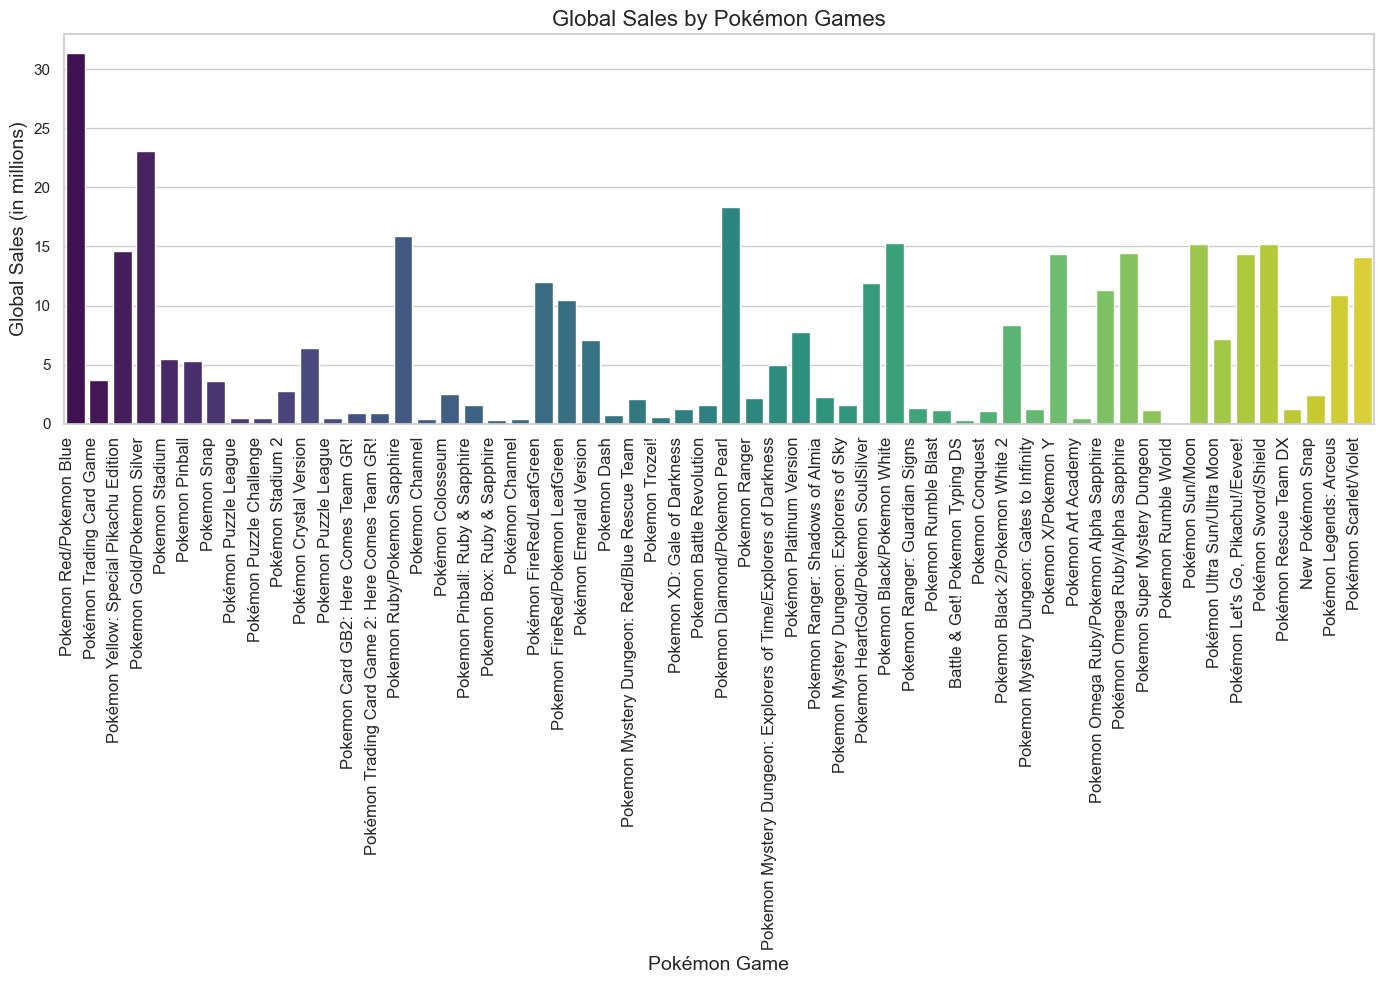

In [88]:
# sorting the data by 'Year'
vgchartz_data_sorted = vgchartz_data.sort_values(by='Year', ascending=True)

# plotting using the sorted df
vgchartz_data_sorted = vgchartz_data_sorted[np.isfinite(vgchartz_data_sorted['Global_Sales'])]

# setting the style and context for the plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# creating the visualization
barplot = sns.barplot(
    x='Name', 
    y='Global_Sales', 
    data=vgchartz_data_sorted, 
    palette='viridis'
)

# adding labels and title
barplot.set_xlabel("Pokémon Game", fontsize=14)
barplot.set_ylabel("Global Sales (in millions)", fontsize=14)
barplot.set_title("Global Sales by Pokémon Games", fontsize=16)

# rotating x-axis labels for better readability
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

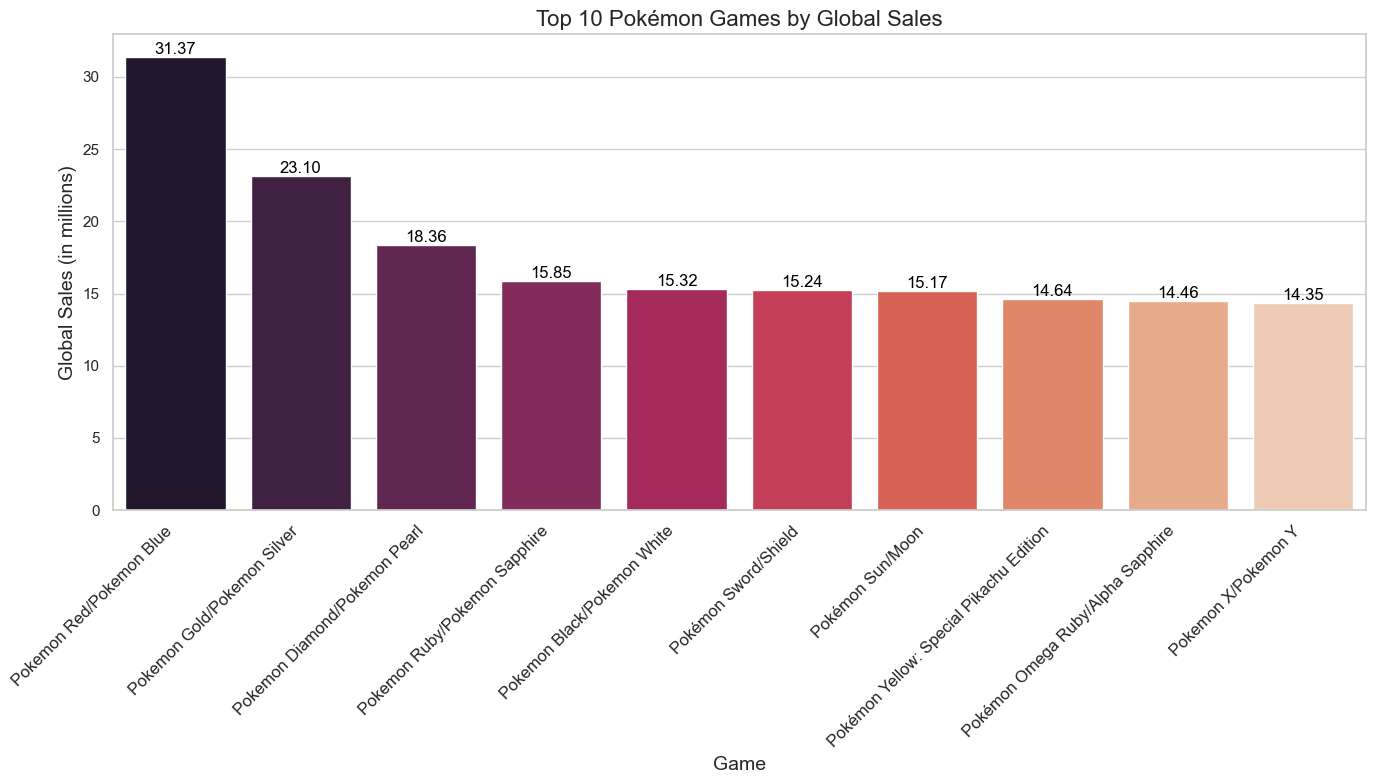

In [89]:
# filtering the top 10 games by global sales
top_10 = vgchartz_data_sorted.nlargest(10, "Global_Sales")
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# creating the bar plot for top 10 games
barplot = sns.barplot(
    x='Name', 
    y='Global_Sales', 
    data=top_10, 
    palette='rocket'
)

# adding labels and title
barplot.set_xlabel("Game", fontsize=14)
barplot.set_ylabel("Global Sales (in millions)", fontsize=14)
barplot.set_title("Top 10 Pokémon Games by Global Sales", fontsize=16)

barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# adding the sales value on top of each bar
for bar in barplot.patches:
    bar_height = bar.get_height()
    barplot.text(
        bar.get_x() + bar.get_width() / 2, 
        bar_height, 
        f'{bar_height:.2f}',  
        ha='center',  
        va='bottom',  
        fontsize=12,  
        color='black'
    )

plt.tight_layout()
plt.show()

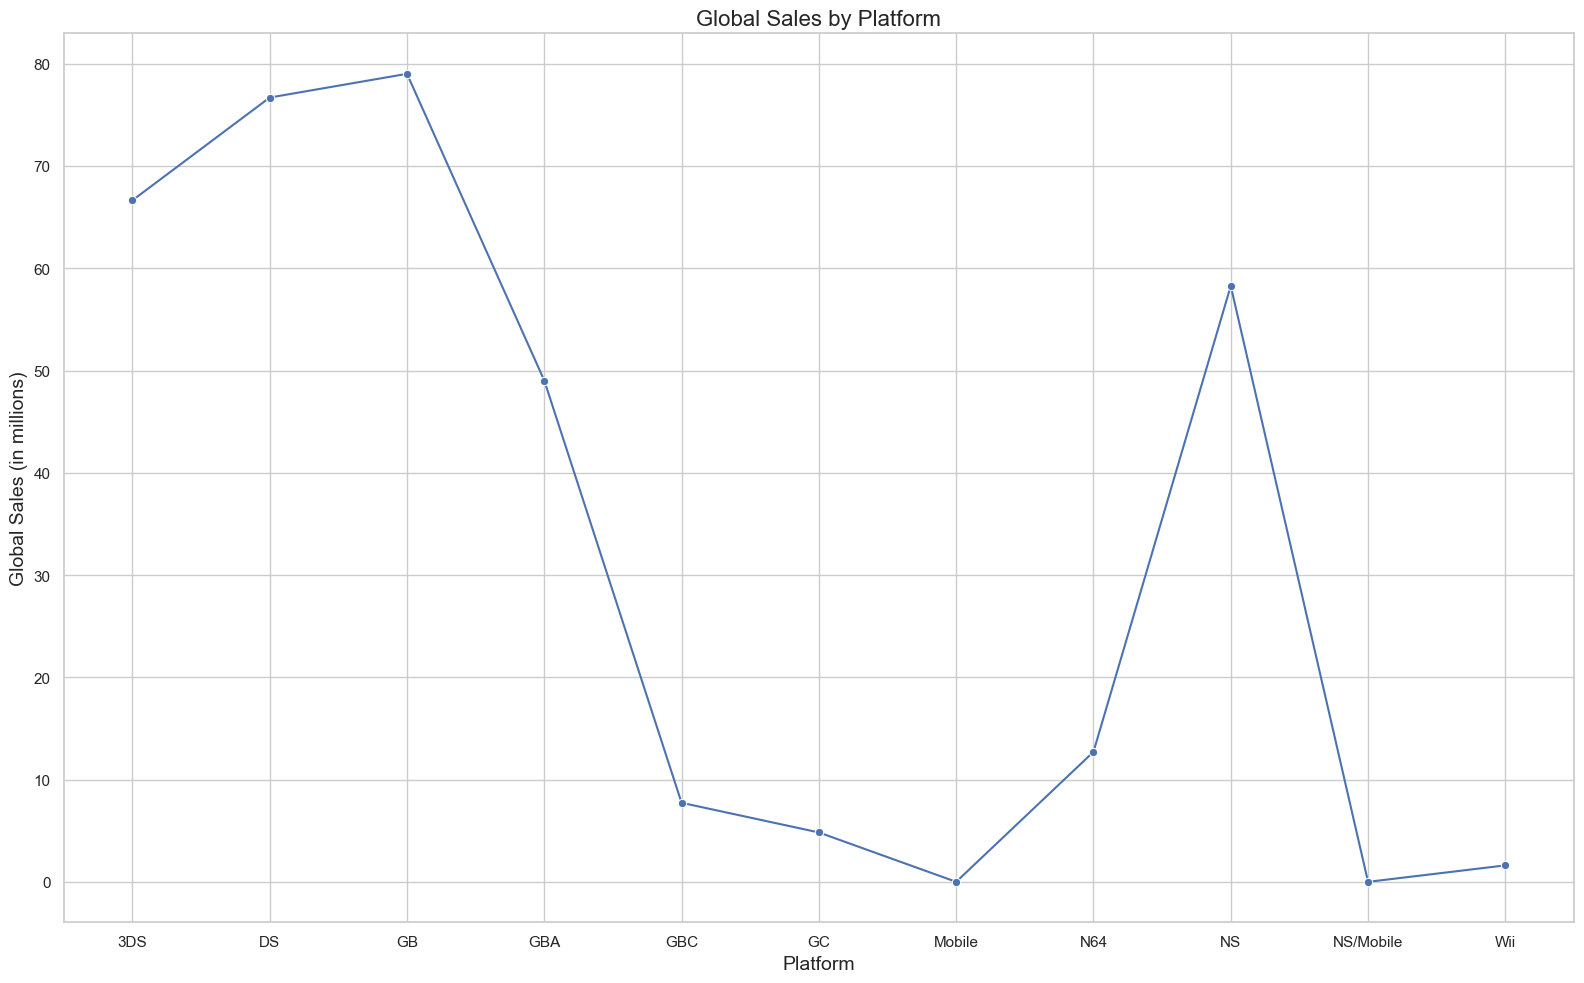

In [90]:
# filling nan values in sales columns with 0
vgchartz_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = vgchartz_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].fillna(0)

# grouping the data by platform and summing the global sales
platform_sales = vgchartz_data.groupby('Platform')['Global_Sales'].sum().reset_index()

# setting the style and context for the plot
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# creating the line plot
lineplot = sns.lineplot(
    data=platform_sales, 
    x='Platform', 
    y='Global_Sales', 
    marker='o'
)

# adding labels and title
lineplot.set_xlabel("Platform", fontsize=14)
lineplot.set_ylabel("Global Sales (in millions)", fontsize=14)
lineplot.set_title("Global Sales by Platform", fontsize=16)

# adjusting layout for better fit
plt.tight_layout()

# displaying the plot
plt.show()

In [91]:
from pptx import Presentation
from PIL import Image
import io
import os

# loading the .pptx file
presentation = Presentation("tableau/best_viz.pptx")

# creating a directory to save images
output_dir = "tableau_images"
os.makedirs(output_dir, exist_ok=True)

# extracting images from each slide
for slide_number, slide in enumerate(presentation.slides, start=1):
    for shape in slide.shapes:
        if shape.shape_type == 13:
            image = shape.image
            
            # for image bytes
            image_bytes = image.blob
            image_format = image.ext  # Get file extension (e.g., jpeg, png)

            # save the image
            image_filename = os.path.join(output_dir, f"slide{slide_number}_image.{image_format}")
            with open(image_filename, "wb") as img_file:
                img_file.write(image_bytes)
            print(f"Saved image: {image_filename}")

Saved image: tableau_images/slide1_image.png
Saved image: tableau_images/slide2_image.png


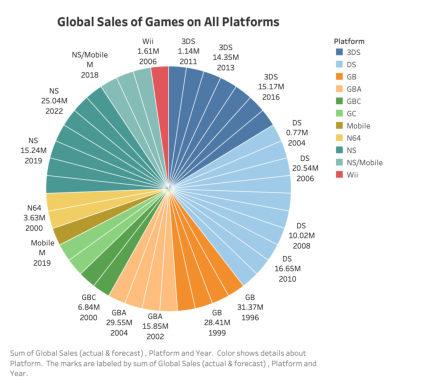

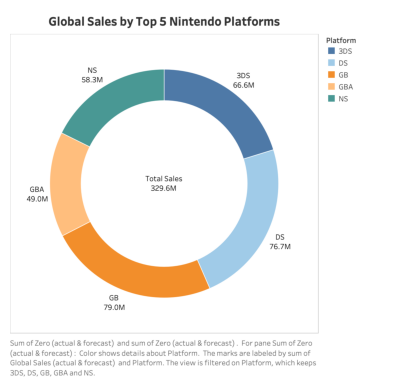

In [92]:
from PIL import Image

viz_1 = Image.open('tableau_images/slide1_image.png')
viz_2 = Image.open('tableau_images/slide2_image.png')

# display visualization
plt.imshow(viz_1)
plt.axis('off')
plt.show()

plt.imshow(viz_2)
plt.axis('off')
plt.show()